### RANDOM FOREST IMPLEMENTATION USING SINGLE FEATURE = SQFT_LIVING AND Y = PRICE USING DATA OF 4994 ROWS 

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [92]:
df9 = pd.read_csv("housingnew.csv")

In [93]:
df9.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,47.5112,-122.257,1340
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,47.7210,-122.319,1690
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,47.7379,-122.233,2720
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,47.5208,-122.393,1360
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,47.6168,-122.045,1800


In [94]:
y = np.array(df9.price).reshape(-1,1)

In [95]:
x = np.array(df9.sqft_living).reshape(-1,1)

In [96]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [97]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2)

In [98]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  

In [99]:
regressor.fit(x, y) 

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [100]:
 regressor.predict([[1000]])

array([239896.82212646])

In [101]:
mse = mean_squared_error(y_test, regressor.predict(x_test))

In [102]:
np.sqrt(mse)

199475.37284724475

In [103]:
regressor.score(x_test,y_test)

0.731332325253493

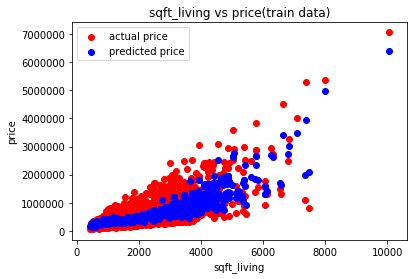

In [104]:
plt.scatter(x_train, y_train, color = "red",label="actual price")
plt.scatter(x_train, regressor.predict(x_train), color = 'blue',label ="predicted price")
plt.legend(loc="upper left")
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.title("sqft_living vs price(train data)")
plt.show()

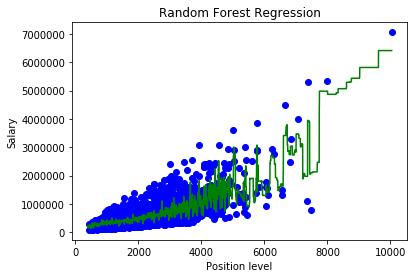

In [105]:
X_grid = np.arange(min(x), max(x), 0.01)                     
X_grid = X_grid.reshape((len(X_grid), 1)) 
plt.scatter(x_train, y_train, color = 'blue')   
plt.plot(X_grid, regressor.predict(X_grid),color = 'green')  
plt.title('Random Forest Regression') 
plt.xlabel('Position level') 
plt.ylabel('Salary') 
plt.show()

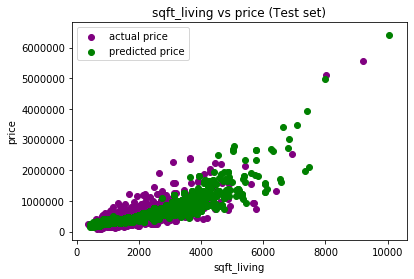

In [106]:
plt.scatter(x_test, y_test, color = 'purple',label = "actual price")
plt.scatter(x_train, regressor.predict(x_train), color = 'green', label ="predicted price")
plt.legend(loc="upper left")
plt.title('sqft_living vs price (Test set)')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()